# Data Exploration and Customers Categorization

In this notebook we explore the data and define the categorization of customers.

## Required libraries

In [1]:
import pandas as pd
import numpy as np
import ast
import seaborn as sns
import numpy as np

import matplotlib.pyplot as plt
from matplotlib import cm
from collections import Counter


## Data Reading 

In [2]:
df = pd.read_csv('../data/ds_challenge_apr2021.csv')

In [20]:
df.head()

,ID_USER,genero,monto,fecha,hora,dispositivo,establecimiento,ciudad,tipo_tc,linea_tc,interes_tc,status_txn,is_prime,dcto,cashback,fraude
0,0,F,608.345634,2020-01-21,20,"{'model': 2020, 'device_score': 3, 'os': 'ANDR...",Super,Merida,Física,71000,51,Aceptada,False,60.834563,5.475111,False
1,0,F,88.719243,2020-01-15,7,"{'model': 2020, 'device_score': 1, 'os': 'ANDR...",NaN,Merida,Virtual,71000,51,Aceptada,False,0.000000,1.774385,False
2,1,F,790.037653,2020-01-17,11,"{'model': 2020, 'device_score': 1, 'os': '.'}",NaN,Guadalajara,Virtual,94000,56,En proceso,False,0.000000,15.800753,False
3,1,F,767.005387,2020-01-05,11,"{'model': 2020, 'device_score': 3, 'os': 'WEB'}",MPago,Guadalajara,Física,94000,56,Aceptada,False,0.000000,7.670054,False
4,1,F,254.171053,2020-01-30,10,"{'model': 2020, 'device_score': 3, 'os': '%%'}",NaN,Guadalajara,Física,94000,56,Aceptada,False,0.000000,2.541711,False


In [21]:
df.dtypes

ID_USER              int64
genero              object
monto              float64
fecha               object
hora                 int64
dispositivo         object
establecimiento     object
ciudad              object
tipo_tc             object
linea_tc             int64
interes_tc           int64
status_txn          object
is_prime              bool
dcto               float64
cashback           float64
fraude                bool
dtype: object

## Data exploration 

The data set we will analyze are records of transactions during January 2020. There is a column named *dispositivo* with the features of the customer's device in an object that we will transfromed in 3 new variables by extracting its information. We aim to understan customers behaviour so we will transform the data to have a record per customer. The variables will be redefinde as following:
- ID_USER: unique key per customer.
- genero: gender.
- monto: average amount that the customer usually makes in each transaction.
- numero_tc: number of transactions that the customer makes per month.
- hora: Median hour of transactions.
- establecimiento: Most frequent type of place where the customer makes his/her transactions.
- ciudad: Most common city where the customer makes his/her transactions.
- tipo_tc: Most common type of transaction between "Física" and "Virtual".
- linea_tc: Maximum credit line of the customer.
- interes_tc: Maximum credit rate of the customer.
- status_txn:  Most common status of transactions.
- is_prime: If the customer is has a prime membership.
- dcto: Average descount.
- cashback: Average cashback.
- fraude: whether a customer has committed fraud at least once.
- model: Most common device model from where the customer perform his/her transactions.
- device_score:  Most common device score from where the customer perform his/her transactions. 
- os: Most common operating system from where the customer perform his/her transactions.

In [13]:
def f_agg_most_frequent_value(values):
    return Counter(list(values)).most_common(1)[0][0]

In [15]:
dict_agg_functions = {
    'monto':'mean',
    'fecha':'count',
    'hora':'median',
    'establecimiento':f_agg_most_frequent_value,
    'ciudad':f_agg_most_frequent_value,
    'tipo_tc':f_agg_most_frequent_value,
    'linea_tc':'max',
    'interes_tc':'max',
    'status_txn':f_agg_most_frequent_value,
    'is_prime':f_agg_at_least_1_True,
    'dcto':'mean',
    'cashback':'mean',
    'fraude':f_agg_at_least_1_True,
    'model':f_agg_most_frequent_value,
    'device_score':f_agg_most_frequent_value,
    'os':f_agg_most_frequent_value,
}

In [19]:
df_customers.head()

,ID_USER,genero,monto,numero_tc,hora,establecimiento,ciudad,tipo_tc,linea_tc,interes_tc,status_txn,is_prime,dcto,cashback,fraude,model,device_score,os
0,0,F,348.532438,2,13.5,Super,Merida,Física,71000,51,Aceptada,False,30.417282,3.624748,False,2020,3,ANDROID
1,1,F,488.113724,7,10.0,NaN,Guadalajara,Física,94000,56,Aceptada,False,17.804483,7.004029,False,2020,3,%%
2,2,F,398.556202,7,10.0,NaN,Toluca,Física,55000,57,Aceptada,False,39.279511,4.092139,False,2020,1,WEB
3,3,F,238.986074,2,15.5,Super,Toluca,Física,62000,34,Aceptada,False,0.000000,2.389861,False,2020,2,ANDROID
4,4,--,277.176524,1,6.0,Restaurante,Merida,Física,83000,37,Aceptada,False,55.435305,2.217412,False,2020,2,WEB


In [22]:
df_customers.describe()

,ID_USER,monto,numero_tc,hora,linea_tc,interes_tc,dcto,cashback,model,device_score
count,4000.000000,4000.000000,4000.00000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.0,4000.000000
mean,1999.500000,495.979337,6.74375,12.010125,62348.750000,48.162000,16.943767,6.208101,2020.0,3.012000
std,1154.844867,163.537484,6.18281,4.443326,21704.824309,9.531682,19.010767,2.476476,0.0,1.424733
min,0.000000,2.038424,1.00000,1.000000,25000.000000,32.000000,0.000000,0.020384,2020.0,1.000000
25%,999.750000,407.530291,2.00000,9.000000,44000.000000,40.000000,0.000000,4.789200,2020.0,2.000000
50%,1999.500000,497.049593,5.00000,12.000000,62000.000000,48.000000,13.652543,6.106787,2020.0,3.000000
75%,2999.250000,584.595949,9.00000,15.000000,81000.000000,56.000000,24.682967,7.412543,2020.0,4.000000
max,3999.000000,999.809231,62.00000,23.000000,99000.000000,64.000000,198.694606,19.881732,2020.0,5.000000


### Analyzing correlation between variables 

In order to analyze the correlation between variables we will transform the categorical data into numeric data.

Observing the linear correlations and the pairplots we found the next relationships:
- There is a dependency between the place of transactions and the number of transactions. 
- Customers that usually make physical transacitions make more transactions.
- There is a positive linear relationship between the amount, cashback and discount of transactions.
- Customers who usually get accepted transactions, make more transactions.
- Customers that have commited fraud make more transactions.
- Customers that usually make physical transactions get less cashback.
- The more discount, the more cashback.

In [28]:
def f_establecimiento_to_int(est):
    if est == 'Super':
        return 1
    elif est == 'MPago':
        return 2
    elif est == 'Abarrotes':
        return 3
    elif est == 'Farmacia':
        return 4
    elif est == 'Restaurante':
        return 5
    else:
        return 0

In [29]:
def f_ciudad_to_int(cd):
    if cd == 'Merida':
        return 1
    elif cd == 'Guadalajara':
        return 2
    elif cd == 'Toluca':
        return 3
    elif cd == 'Monterrey':
        return 4
    else:
        return 0

In [30]:
def f_os_to_int(os):
    if os == 'ANDROID':
        return 1
    elif os == '.':
        return 2
    elif os == 'WEB':
        return 3
    elif os == '%%':
        return 4
    else:
        return 0

In [33]:
df_customers.head()

,ID_USER,genero,monto,numero_tc,hora,establecimiento,ciudad,tipo_tc,linea_tc,interes_tc,status_txn,is_prime,dcto,cashback,fraude,model,device_score,os
0,0,F,348.532438,2,13.5,Super,Merida,Física,71000,51,Aceptada,False,30.417282,3.624748,False,2020,3,ANDROID
1,1,F,488.113724,7,10.0,NaN,Guadalajara,Física,94000,56,Aceptada,False,17.804483,7.004029,False,2020,3,%%
2,2,F,398.556202,7,10.0,NaN,Toluca,Física,55000,57,Aceptada,False,39.279511,4.092139,False,2020,1,WEB
3,3,F,238.986074,2,15.5,Super,Toluca,Física,62000,34,Aceptada,False,0.000000,2.389861,False,2020,2,ANDROID
4,4,--,277.176524,1,6.0,Restaurante,Merida,Física,83000,37,Aceptada,False,55.435305,2.217412,False,2020,2,WEB


In [34]:
df_mod_numeric = df_customers.copy()
df_mod_numeric['genero'] = df_mod_numeric['genero'].apply(lambda x: 1 if x == "F" else(0 if x == '--' else -1))
df_mod_numeric['establecimiento']= df_mod_numeric['establecimiento'].apply(lambda x: f_establecimiento_to_int(x))
df_mod_numeric['ciudad']= df_mod_numeric['ciudad'].apply(lambda x: f_ciudad_to_int(x))
df_mod_numeric['tipo_tc'] = df_mod_numeric['tipo_tc'].apply(lambda x: 1 if x == "Física" else 0)
df_mod_numeric['status_txn'] = df_mod_numeric['status_txn'].apply(lambda x: 1 if x == "Aceptada" else(0 if x == 'En proceso' else -1))
df_mod_numeric['is_prime'] = df_mod_numeric['is_prime']*1
df_mod_numeric['fraude'] = df_mod_numeric['fraude']*1
df_mod_numeric['os']= df_mod_numeric['os'].apply(lambda x: f_os_to_int(x))

<AxesSubplot:>

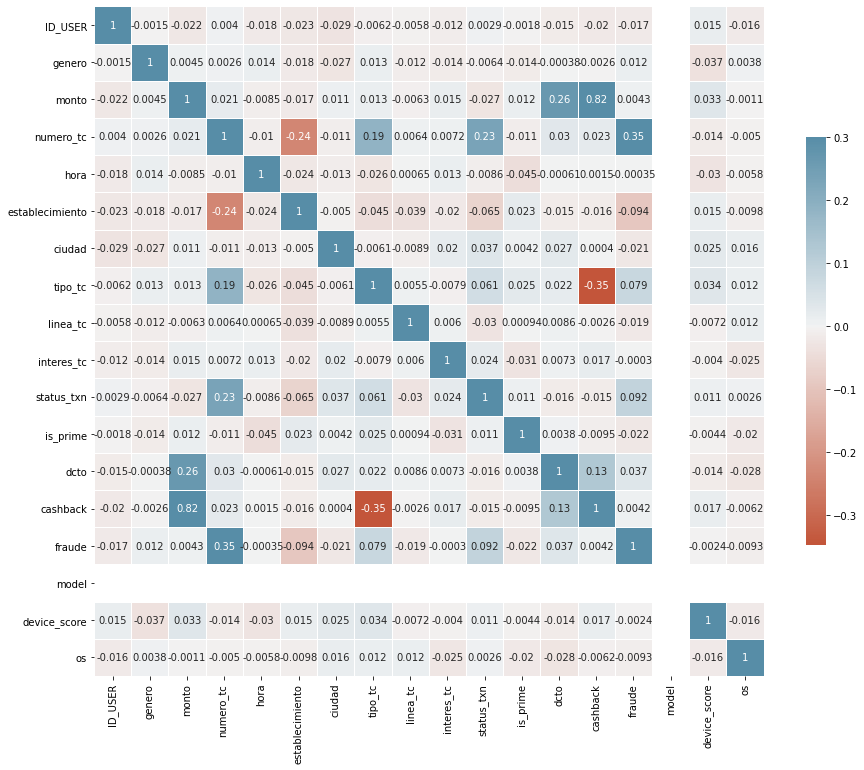

In [35]:
df_corr = df_mod_numeric.corr()
f, ax = plt.subplots(figsize=(15, 15))
cmap = sns.diverging_palette(20, 230, as_cmap=True)
sns.heatmap(df_corr, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5},annot=True)

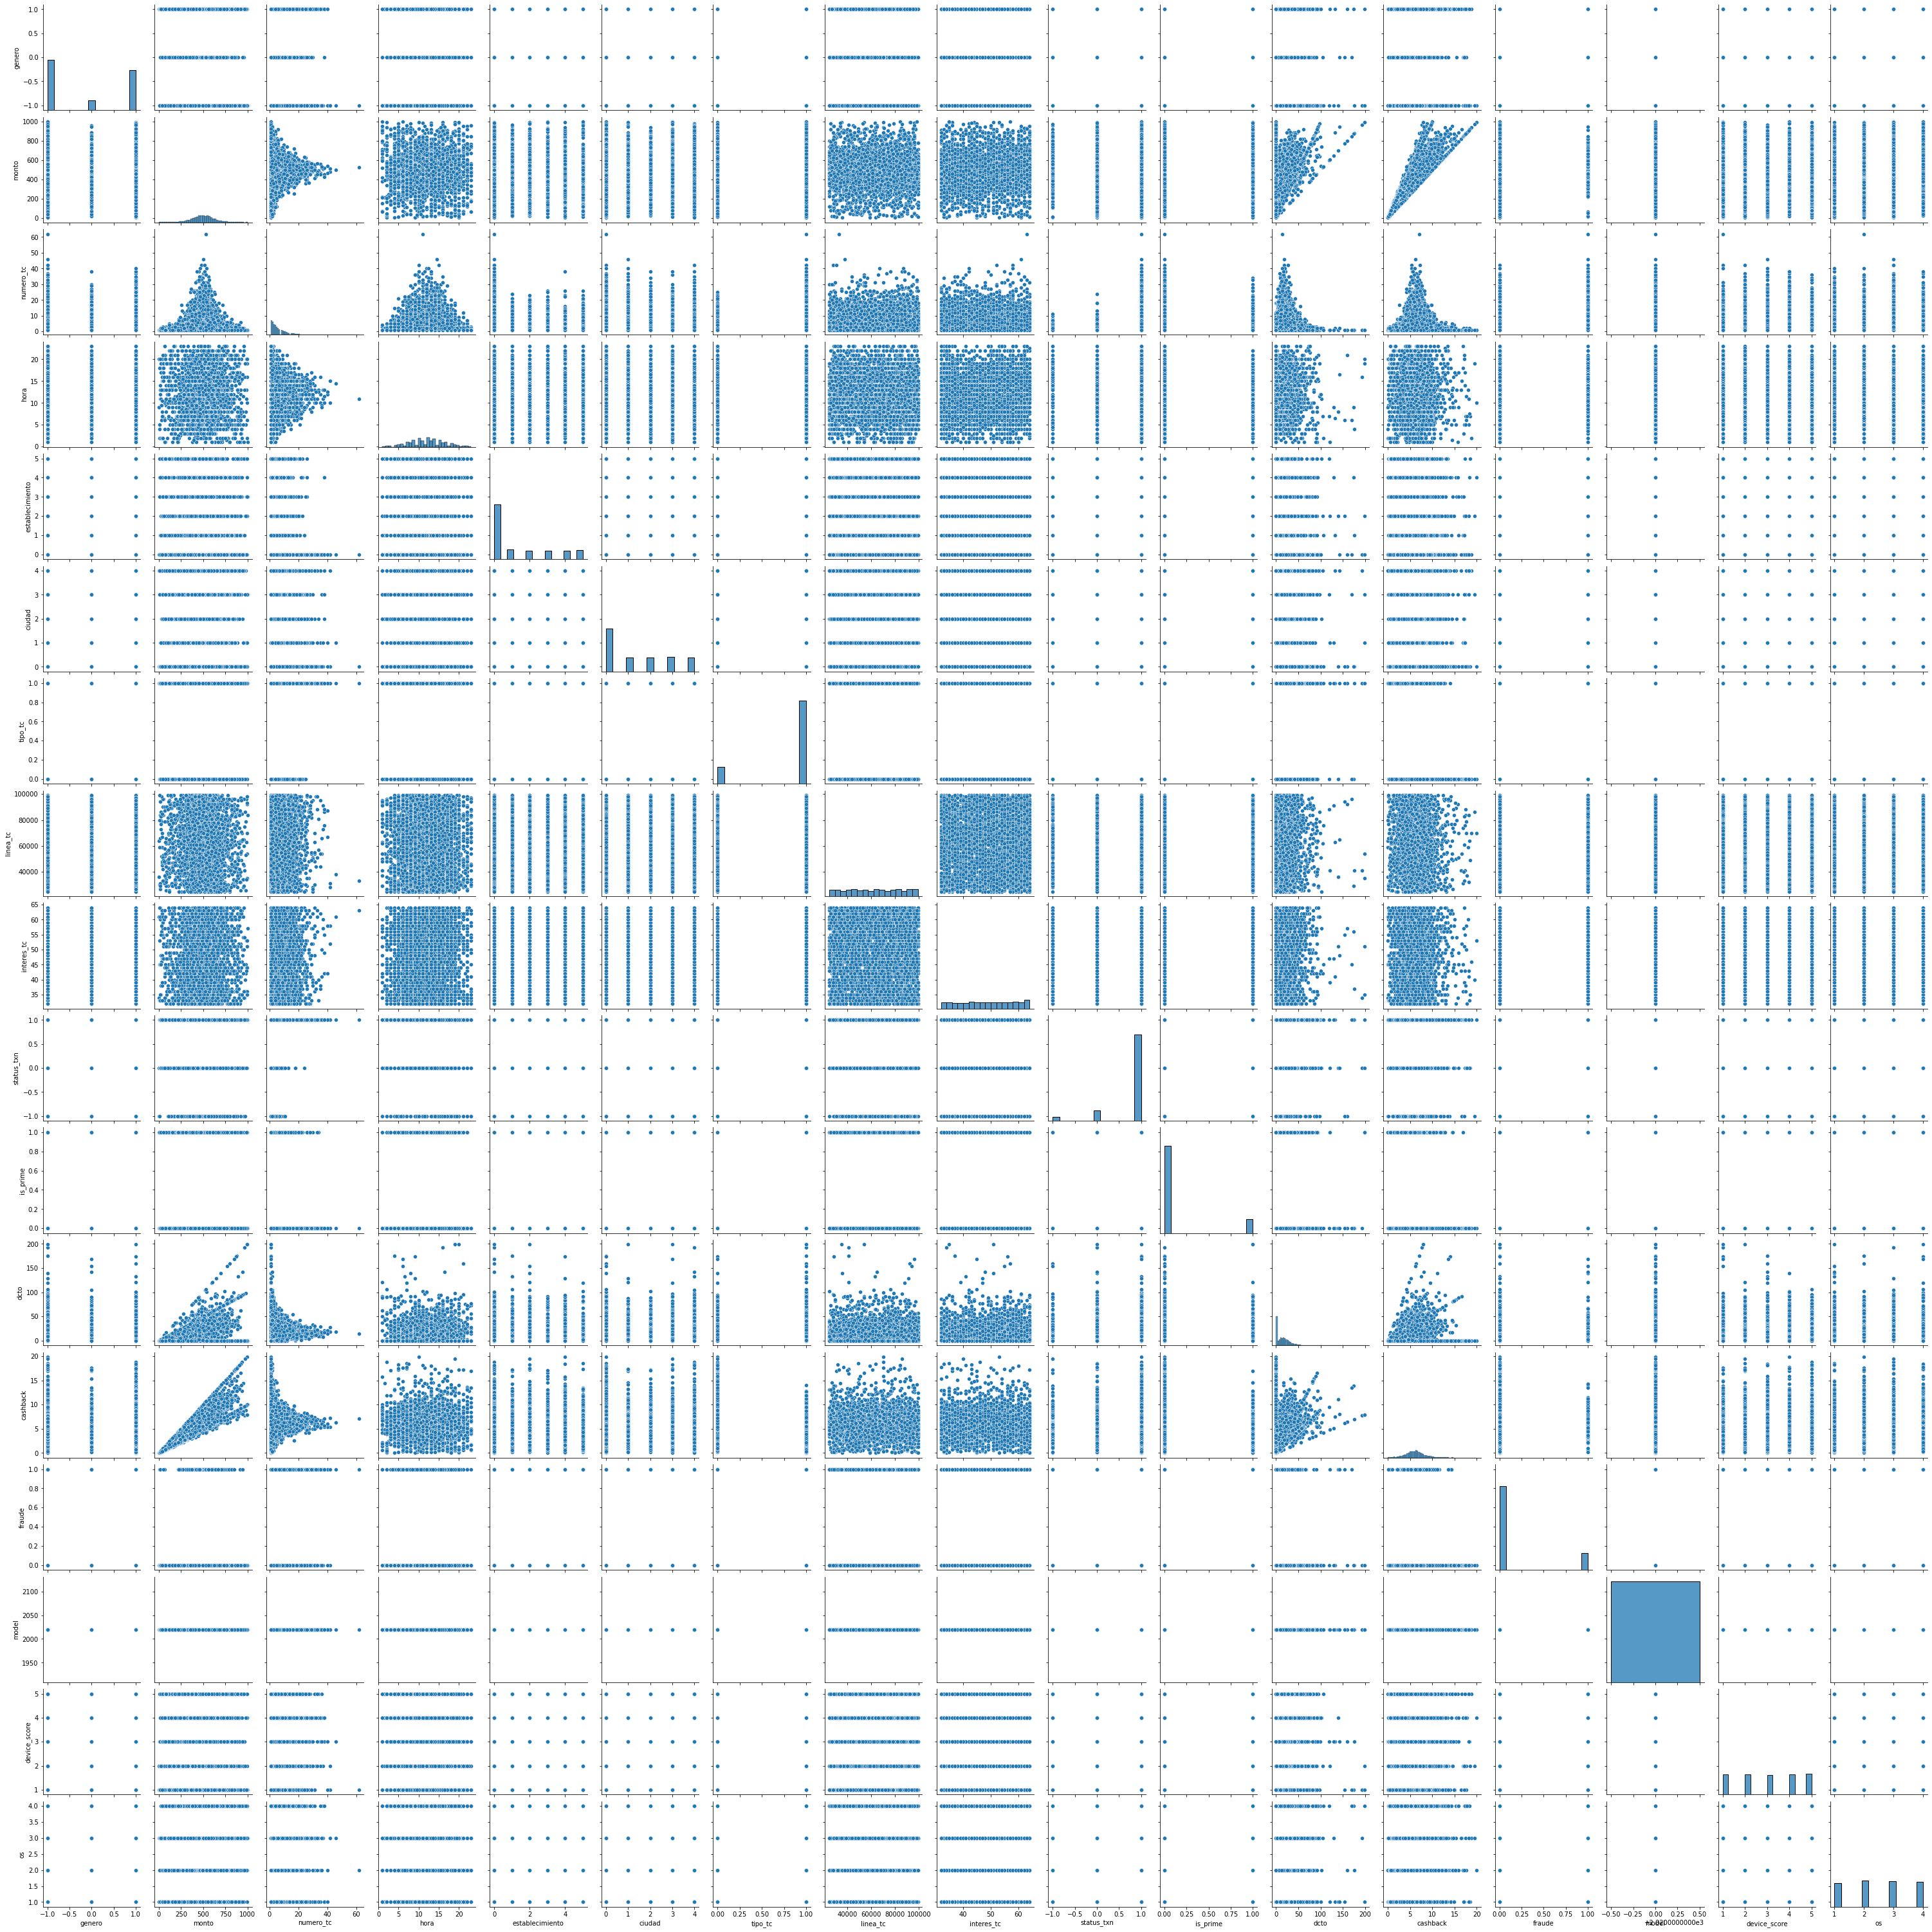

In [37]:
sns.pairplot(data = df_mod_numeric.drop(columns='ID_USER'))

### Categorization 

From our findings we propose the next hypothesis: Customers with higher number of transactions that usually buy in physical places are more likely to commit fraud.

In order to test this hypothesis we categorized customers as follows:
- Very High Potential Fraudster: Usually makes physical transactions and belong to the highest quartile of number of transactions.
- High Potential Fraudster: Usually makes physical transactions and belong to the second or third quartile of number of transactions.
- Low potential Fraudster: Otherwise.

After test the hypothesis by plotting the frequency of fraudster per cluster, we concluded that this categorization measures the likelihood of fraudsters rightly. We got the next likelihood per cluster:
- Very High Potential Fraudster: ~52% 
- High Potential Fraudster: ~36%
- Low potential Fraudster: ~12%

In [56]:
# Categorization of customers
q_25 = df_customers['numero_tc'].quantile(q=0.25)
q_75 = df_customers['numero_tc'].quantile(q=0.75)
df_customers['potential_fraudster'] = 'Low'
df_customers['potential_fraudster'] = df_customers[['tipo_tc','numero_tc','potential_fraudster']].apply(lambda x: 'Very High' if (x[0]=='Física' and x[1]>=q_75) else x[2],axis=1)
df_customers['potential_fraudster'] = df_customers[['tipo_tc','numero_tc','potential_fraudster']].apply(lambda x: 'High' if (x[0]=='Física' and x[1]>=q_25 and x[1]<q_75) else x[2],axis=1)

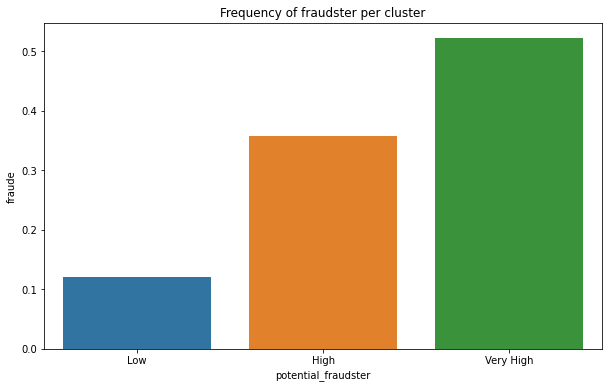

In [58]:
# Testing the hypothesis with visualization.
df_plot = df_customers.groupby('potential_fraudster',as_index=False).agg({'fraude':'sum'})
df_plot['fraude'] = df_plot['fraude'] / df_plot['fraude'].sum()
plt.figure(figsize=(10,6))
sns.barplot(data = df_plot,x='potential_fraudster',y='fraude',order=['Low','High','Very High'])
plt.title('Frequency of fraudster per cluster')
plt.show()

## Data Exportation 

In [59]:
df_customers.head()

,ID_USER,genero,monto,numero_tc,hora,establecimiento,ciudad,tipo_tc,linea_tc,interes_tc,status_txn,is_prime,dcto,cashback,fraude,model,device_score,os,potential_fraudster
0,0,F,348.532438,2,13.5,Super,Merida,Física,71000,51,Aceptada,False,30.417282,3.624748,False,2020,3,ANDROID,High
1,1,F,488.113724,7,10.0,NaN,Guadalajara,Física,94000,56,Aceptada,False,17.804483,7.004029,False,2020,3,%%,High
2,2,F,398.556202,7,10.0,NaN,Toluca,Física,55000,57,Aceptada,False,39.279511,4.092139,False,2020,1,WEB,High
3,3,F,238.986074,2,15.5,Super,Toluca,Física,62000,34,Aceptada,False,0.000000,2.389861,False,2020,2,ANDROID,High
4,4,--,277.176524,1,6.0,Restaurante,Merida,Física,83000,37,Aceptada,False,55.435305,2.217412,False,2020,2,WEB,Low


In [60]:
df_customers.isna().sum()

ID_USER                   0
genero                    0
monto                     0
numero_tc                 0
hora                      0
establecimiento        2176
ciudad                 1721
tipo_tc                   0
linea_tc                  0
interes_tc                0
status_txn                0
is_prime                  0
dcto                      0
cashback                  0
fraude                    0
model                     0
device_score              0
os                        0
potential_fraudster       0
dtype: int64

In [61]:
df_customers.fillna('Otro',inplace=True)

In [62]:
df_customers.to_csv('../data/df_customers_processed.csv',index=False)